In [1]:
import matplotlib.pyplot as plt
import timeit
import sys

module_path = '../src/'

sys.path.append(module_path)
from implement_TeVSGT import *

Compiling TeVSGT...

Done! 


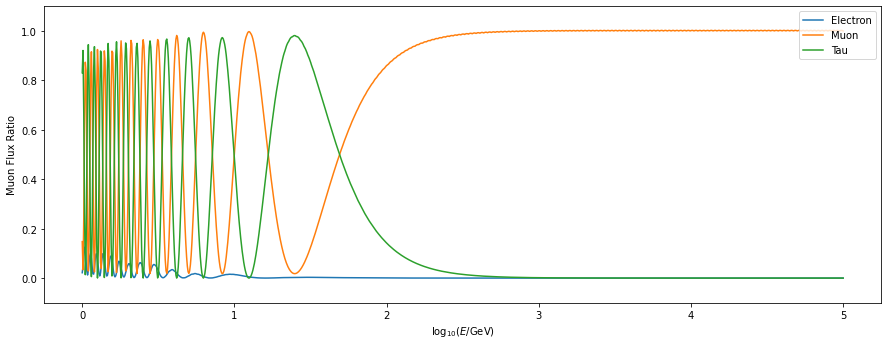

Time:  3.1256877549894853


In [2]:
start = timeit.default_timer()

model_type = "SM"
params_ranges = []
neutrino_type = "antineutrino" 
L = 12742 # km
E_min = 1 # GeV
E_max = 1e5 # GeV
E_range = [E_min, E_max]
medium = "earth"
initial_flux_ratios = [0, 1, 0]
NormalOrdering = True

data = implement_model(model_type, params_ranges, E_range, [medium, [-1, 0, 2]], initial_flux_ratios, neutrino_type, NormalOrdering, Nen=1000)

energy = data[0, :, 0] # in GeV
log_energy = np.log10(energy)

# Plot settings
plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 2)  
plt.ylim(-0.1, 1.1)
plt.xlabel(r'$\log_{10}(E/\mathrm{GeV})$')
plt.ylabel('Muon Flux Ratio')
plt.plot(log_energy, data[0, :, 1], label='Electron')
plt.plot(log_energy, data[0, :, 2], label='Muon')
plt.plot(log_energy, data[0, :, 3], label='Tau')
plt.legend(loc='upper right')



plt.show()

stop = timeit.default_timer()

print('Time: ', stop - start)

Compiling TeVSGT...

Done! 


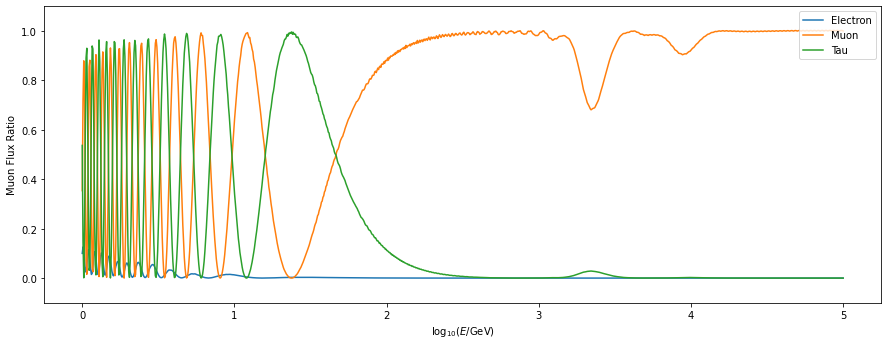

Time:  35.48435256400262


In [5]:
start = timeit.default_timer()

model_type = "ADD"
params_ranges = [[0.2, 0.2, 1], [0, 0.0, 1]]
neutrino_type = "antineutrino" 
L = 12742 # km
E_min = 1 # GeV
E_max = 1e5 # GeV
E_range = [E_min, E_max]
medium = "earth"
initial_flux_ratios = [0, 1, 0]
NormalOrdering = True

data = implement_model(model_type, params_ranges, E_range, [medium, [-1, 0, 2]], initial_flux_ratios, neutrino_type, NormalOrdering, Nen=1000)

energy = data[0, 0, 0, :, 0] # in GeV
log_energy = np.log10(energy)

# Plot settings
plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 2)  
plt.ylim(-0.1, 1.1)
plt.xlabel(r'$\log_{10}(E/\mathrm{GeV})$')
plt.ylabel('Muon Flux Ratio')
plt.plot(log_energy, data[0, 0, 0, :, 1], label='Electron')
plt.plot(log_energy, data[0, 0, 0, :, 2], label='Muon')
plt.plot(log_energy, data[0, 0, 0, :, 3], label='Tau')
plt.legend(loc='upper right')



plt.show()

stop = timeit.default_timer()

print('Time: ', stop - start)

Compiling TeVSGT...

Done! 


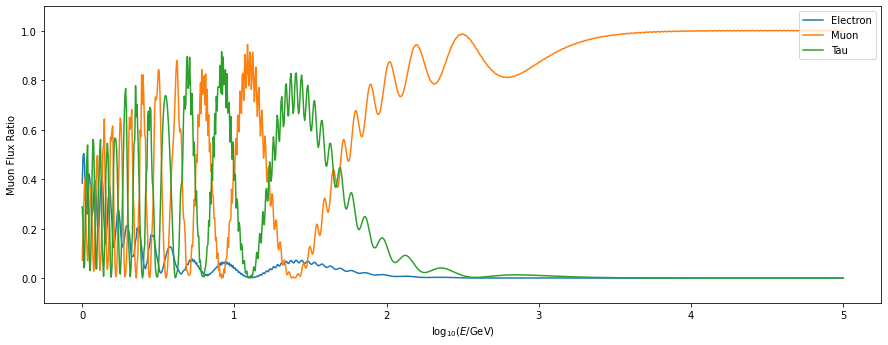

Time:  2.2258268909936305


In [6]:
start = timeit.default_timer()

model_type = "SM_Copies"
params_ranges = [[10, 10, 1], [5, 5, 1], [0, 0, 1]]
neutrino_type = "antineutrino" 
L = 12742 # km
E_min = 1 # GeV
E_max = 1e5 # GeV
E_range = [E_min, E_max]
medium = "vacuum"
initial_flux_ratios = [0, 1, 0]
NormalOrdering = True

data = implement_model(model_type, params_ranges, E_range, [medium, [L, L, 2]], initial_flux_ratios, neutrino_type, NormalOrdering, Nen=1000)

energy = data[0, 0, 0, 0, :, 0] # in GeV
log_energy = np.log10(energy)

# Plot settings
plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 2)  
plt.ylim(-0.1, 1.1)
plt.xlabel(r'$\log_{10}(E/\mathrm{GeV})$')
plt.ylabel('Muon Flux Ratio')
plt.plot(log_energy, data[0, 0, 0, 0, :, 1], label='Electron')
plt.plot(log_energy, data[0, 0, 0, 0, :, 2], label='Muon')
plt.plot(log_energy, data[0, 0, 0, 0, :, 3], label='Tau')
plt.legend(loc='upper right')



plt.show()

stop = timeit.default_timer()

print('Time: ', stop - start)

make: Nothing to be done for 'examples_AZ'.

Done! 
Time:  1571.3366963650042


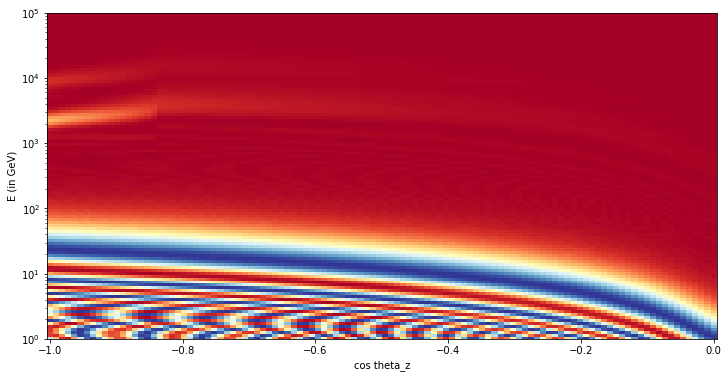

In [420]:
start = timeit.default_timer()

model_type = "ADD"
params_ranges = [[0.2, 0.2, 1], [0, 0, 1]]
neutrino_type = "antineutrino" 
L = 12742 # km
E_min = 1 # GeV
E_max = 1e5 # GeV
E_range = [E_min, E_max]
medium = "earth"
initial_flux_ratios = [0, 1, 0]
NormalOrdering = True

n_mesh = 110
data = implement_model(model_type, params_ranges, E_range, [medium, [-1, 0, n_mesh]], initial_flux_ratios, neutrino_type, NormalOrdering, Nen=n_mesh)

energy = data[0, 0, 0, :, 0] # in GeV
cos = np.linspace(-1, 0, n_mesh)

flux_ratio_grid = data[:, 0, 0, :, 2].T

cosX, EY = np.meshgrid(cos, energy)

fig, ax = plt.subplots(1, 1, figsize=(12,6))


ax.set_yscale('log')
ax.set_xlabel("cos theta_z")
ax.set_ylabel("E (in GeV)")
ax.set_ylim([E_min, E_max])


plt.pcolormesh(cosX, EY, flux_ratio_grid, cmap = "RdYlBu_r", vmin=0, vmax=1)

#fig.savefig('AZ_ADD_Earth_angle.jpg',bbox_inches='tight', dpi=150)

stop = timeit.default_timer()

print('Time: ', stop - start)